# Session #2: Foundations of Data & Python

## 1. Recap & Session Goals

Today we’ll:
- Recap functions and loops, from Session #1  
- Explore NumPy arrays and vectorized operations  
- Dive into Pandas Series and DataFrame basics  
- Manipulate tabular data: select, filter, group, merge  
- Build a simple Data Profiler that reads a CSV and prints summary stats  

## 2. Imports & Environment Check

In [ ]:
# Standard imports
import sys
import numpy as np
import pandas as pd

print("Python:", sys.version.split()[0])
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)

Python: 3.12.12
NumPy: 2.0.2
Pandas: 2.2.2


## 3. Quick Recap: Python Functions

In [ ]:
# Define a function with default & keyword arguments
def greet(name, prefix="Hello"):
    print(f"{prefix}, {name}!")

# Example calls
greet("Alice")
greet("Bob", prefix="Welcome")

Hello, Alice!
Welcome, Bob!


In [ ]:
greet(prefix='Welcome', name='Jeff')

Welcome, Jeff!


Practice  
1. Write a function `add(a, b=5)` that returns the sum of two numbers.  
2. Write a function `is_even(n)` that returns `True` if `n` is even, else `False`.  
Run and test both functions with different inputs.

In [ ]:
def add(a, b=5):
  return a + b

In [ ]:
assert add(2, 3) == 5
assert add(5) == 10

In [ ]:
add(14, -4)

10

In [ ]:
def is_even(n):
  print(n % 2 == 0)

In [ ]:
assert is_even(2) == True
assert is_even(7) == False

In [ ]:
is_even(7)

False


In [ ]:
my_result = is_even(7)

False


In [ ]:
my_result

## 4. NumPy Basics

TLDR: NumPy arrays provide fast, vectorized numeric operations.

NumPy is the foundational package for numerical computing in Python. It introduces the n-dimensional array (`ndarray`) as its core data structure, enabling:

- Efficient storage and manipulation of large numerical datasets  
- Vectorized operations that replace explicit Python loops for speed  
- A rich set of mathematical, statistical, and linear algebra “universal functions”  
- Seamless interoperability with other scientific libraries (SciPy, scikit-learn, Pandas)  

In [ ]:
# Create arrays
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.arange(10)          # 0 through 9
arr3 = np.linspace(0, 1, 5)   # 5 values between 0 and 1

print("arr1:", arr1)
print("arr2:", arr2)
print("arr3:", arr3)

arr1: [1 2 3 4 5]
arr2: [0 1 2 3 4 5 6 7 8 9]
arr3: [0.   0.25 0.5  0.75 1.  ]


In [ ]:
arr2[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
arr2[0:5]

array([0, 1, 2, 3, 4])

In [ ]:
arr2[5:]

array([5, 6, 7, 8, 9])

In [ ]:
# Vectorized operations
print("arr1 * 2:", arr1 * 2)
print("arr2 + arr3[:5]:", arr2[:5] + arr3)

arr1 * 2: [ 2  4  6  8 10]
arr2 + arr3[:5]: [0.   1.25 2.5  3.75 5.  ]


In [ ]:
%%timeit
[x * 2 for x in [1, 2, 3, 4, 5]]

203 ns ± 6.85 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%%timeit
arr1 * 2

1.02 µs ± 5.08 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
# 1. Time the list comprehension
list_numbs = list(range(1000))
list_prof = %timeit -o [int(x * 2) for x in list_numbs]


# 2. Time the NumPy vectorized operation
# %timeit -o returns a TimeitResult object
arr_test = np.arange(1000)
np_prof   = %timeit -o arr_test * 2

# 3. Compute how many times faster NumPy is
speedup = list_prof.average / np_prof.average
print(f"NumPy vectorization is {speedup:.2f}× faster than list comprehension.")

97.2 µs ± 15.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.75 µs ± 246 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
NumPy vectorization is 55.44× faster than list comprehension.


In [ ]:
M

array([[1, 2],
       [3, 4]])

In [ ]:
arr1[:2]

array([1, 2])

In [ ]:
M.transpose()

array([[1, 3],
       [2, 4]])

In [ ]:
M

array([[1, 2],
       [3, 4]])

In [ ]:
M.T

array([[1, 3],
       [2, 4]])

In [ ]:
print("arr1 + 2:", arr1 + 2)
print("arr1 * arr2:", arr1 * arr2[:5])
print("Mean of arr1:", arr1.mean())

# Matrix operations
M = np.array([[1, 2],[3, 4]])
print("Transpose:\n", M.T)
print("Dot product:", M.dot(arr1[:2]))

arr1 + 2: [3 4 5 6 7]
arr1 * arr2: [ 0  2  6 12 20]
Mean of arr1: 3.0
Transpose:
 [[1 3]
 [2 4]]
Dot product: [ 5 11]


Practice  
1. Create a 3×3 identity matrix.  
2. Generate a random 1D array of length 5 (values between 0 and 1).  
3. Compute its min, max, mean, and standard deviation.

In [ ]:
from numpy._core.numeric import identity
# Create a 3×3 identity matrix.

identity_matrix = np.identity(3)
print(identity_matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
# Generate a random 1D array of length 5 (values between 0 and 1).

random_array = np.random.rand(5)
random_array

array([0.36754709, 0.46861617, 0.08405668, 0.0086514 , 0.70669536])

In [ ]:
random_uniform = np.random.uniform(size=5)
random_uniform

array([0.56957037, 0.14466723, 0.14459068, 0.16428547, 0.91733989])

In [ ]:
random_normal = np.random.normal(size=5)
random_normal

array([ 1.01408815, -0.57136367, -0.75086145,  0.90636906,  2.17513302])

<Axes: ylabel='Count'>

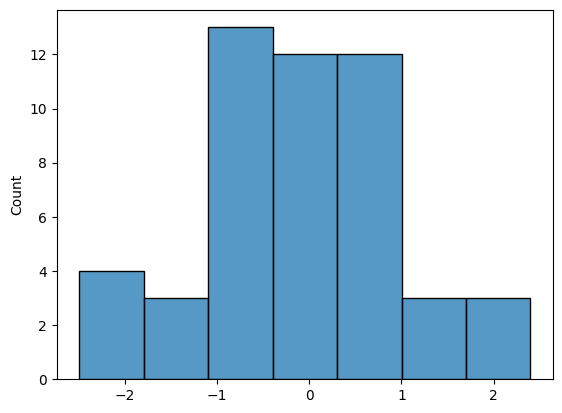

In [ ]:
import seaborn as sns

sns.histplot(np.random.normal(size=50))

<Axes: ylabel='Count'>

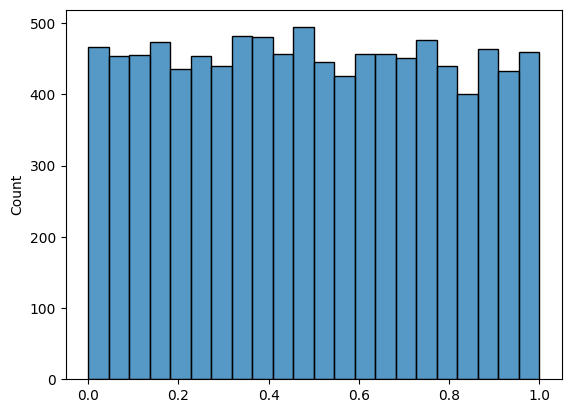

In [ ]:
|sns.histplot(np.random.uniform(size=10000))

<Axes: ylabel='Count'>

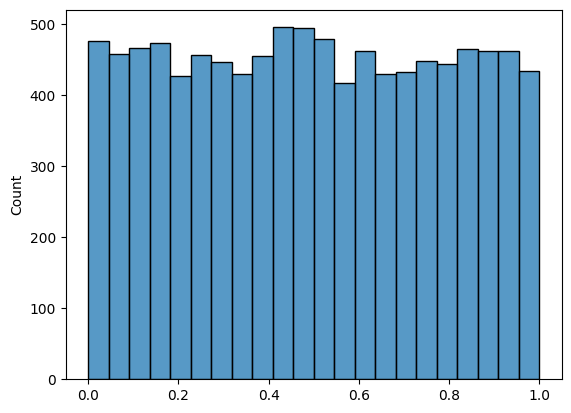

In [ ]:
sns.histplot(np.random.rand(10000))

In [ ]:
# Compute its min, max, mean, and standard deviation.

# min
np.min(random_array), random_array.min()

(np.float64(0.008651396642984088), np.float64(0.008651396642984088))

In [ ]:
# max
print(random_array.max())

# mean
print(random_array.mean())

# standard deviation
print(random_array.std())

0.7066953558840698
0.3271133390986211
0.25543492047625715


In [ ]:
random_array

array([0.36754709, 0.46861617, 0.08405668, 0.0086514 , 0.70669536])

## 4. Pandas Basics

TLDR: Pandas builds on NumPy to handle labeled, tabular data.

- **Series**: 1D labeled array, ideal for time series and indexed data  
- **DataFrame**: 2D table with labeled rows and columns, akin to a spreadsheet or SQL table  

Key features include:

- Easy reading and writing of CSV, Excel, SQL, JSON, and more  
- Flexible row/column selection, slicing, and filtering  
- Robust handling of missing values and mixed data types  
- Powerful `groupby` for aggregation, transformation, and filtering  
- Built-in support for reshaping (pivot, melt) and time series operations  

In [ ]:
# Series: one-dimensional
s = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
print("\nSeries:\n")
s


Series:



,0
a,10
b,20
c,30


In [ ]:
# DataFrame: two-dimensional
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'age': [25, 30, 35, 40],
    'salary': [70000, 80000, 90000, 100000]
})
print("\nDataFrame:\n")
df


DataFrame:



,name,age,salary
0,Alice,25,70000
1,Bob,30,80000
2,Charlie,35,90000
3,Diana,40,100000


In [ ]:
df.set_index('name', inplace=True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,name,age,salary
0,Alice,25,70000
1,Bob,30,80000
2,Charlie,35,90000
3,Diana,40,100000


## 5. Intro to Data Manipulation

We’ll cover:
- Reading CSVs  
- Inspecting data (head, info, describe)  
- Selecting & filtering  
- GroupBy aggregations  
- Adding/dropping columns  

In [ ]:
titanic = pd.read_csv('/content/titanic (2).csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
df = pd.read_csv(url)
print("\nLoaded tips.csv – first 5 rows:\n")
df.head(5)


Loaded tips.csv – first 5 rows:



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df['day'].value_counts(normalize=True)

,proportion
day,
Sat,0.356557
Sun,0.311475
Thur,0.254098
Fri,0.077869


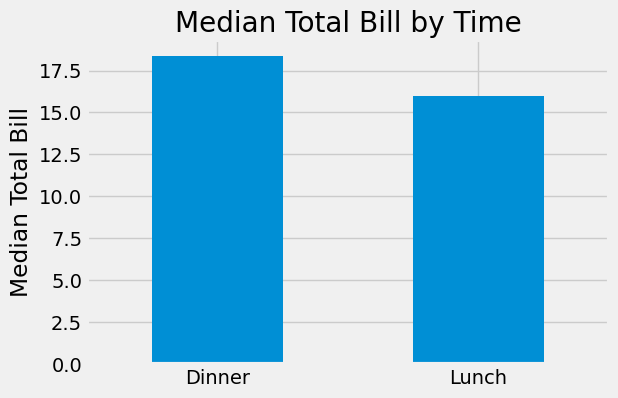

In [ ]:
import matplotlib.pyplot as plt

with plt.style.context('fivethirtyeight'):
  df.groupby('time')['total_bill'].median().plot(kind='bar', figsize=(6, 4))
  plt.title('Median Total Bill by Time')
  plt.ylabel('Median Total Bill')
  plt.xticks(rotation=0)
  plt.xlabel('');

In [ ]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [ ]:
df['tip_pct'] = (df['tip'] / df['total_bill'] * 100).round(2)
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05


In [ ]:
df['tip_pct'].describe()

,tip_pct
count,244.000000
mean,16.079754
std,6.107020
min,3.560000
25%,12.910000
50%,15.475000
75%,19.147500
max,71.030000


In [ ]:
df = df.drop(columns=['tip_pct'])

In [ ]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [ ]:
# 5.2 Inspect
print("\nInfo:")
df.info()
print("\nStatistics:\n", df.describe(include='all'))

# 5.3 Select & Filter
print("\nSelect columns:", df[['total_bill', 'tip']].head())
high_tips = df[df['tip'] > 5]
print("\nRows where tip > 5:\n", high_tips.head())

# 5.4 GroupBy
grouped = df.groupby('day')['total_bill'].agg(['mean', 'count'])
print("\nAverage bill by day:\n", grouped)

# 5.5 Add & Drop Columns
df['tip_pct'] = df['tip'] / df['total_bill'] * 100
print("\nWith tip_pct column:\n", df[['total_bill','tip_pct']].head())
df = df.drop(columns=['tip_pct'])


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB

Statistics:
         total_bill         tip   sex smoker  day    time        size
count   244.000000  244.000000   244    244  244     244  244.000000
unique         NaN         NaN     2      2    4       2         NaN
top            NaN         NaN  Male     No  Sat  Dinner         NaN
freq           NaN         NaN   157    151   87     176         NaN
mean     19.785943    2.998279   NaN    NaN  NaN     NaN    2.569672
std       8.902412    1.38363

In [ ]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


🧩 Practice  
1. Filter rows where `day` is Saturday or Sunday
2. Make a new column named `total_bill_with_tip`  
3. Sort the DataFrame by `total_bill_with_tip`.  


In [ ]:
weekend = df[(df['day'] == 'Sat') | (df['day'] == 'Sun')]
weekend['day'].unique()

array(['Sun', 'Sat'], dtype=object)

In [ ]:
df[df['day'].isin(['Sat', 'Sun'])]['day'].unique()

array(['Sun', 'Sat'], dtype=object)

In [ ]:
df['total bill with tip'] = df['total_bill'] + df['tip']

In [ ]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,total bill with tip
0,16.99,1.01,Female,No,Sun,Dinner,2,18.0
1,10.34,1.66,Male,No,Sun,Dinner,3,12.0


In [ ]:
df.total bill with tip.head()

SyntaxError: invalid syntax (ipython-input-3809788370.py, line 1)

In [ ]:
df.columns = ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'total_bill_with_tip']
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,total_bill_with_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,18.0
1,10.34,1.66,Male,No,Sun,Dinner,3,12.0


In [ ]:
df.sort_values(by='total_bill_with_tip', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,total_bill_with_tip
170,50.81,10.00,Male,Yes,Sat,Dinner,3,60.81
212,48.33,9.00,Male,No,Sat,Dinner,4,57.33
59,48.27,6.73,Male,No,Sat,Dinner,4,55.00
156,48.17,5.00,Male,No,Sun,Dinner,6,53.17
182,45.35,3.50,Male,Yes,Sun,Dinner,3,48.85
...,...,...,...,...,...,...,...,...
218,7.74,1.44,Male,Yes,Sat,Dinner,2,9.18
195,7.56,1.44,Male,No,Thur,Lunch,2,9.00
111,7.25,1.00,Female,No,Sat,Dinner,1,8.25
92,5.75,1.00,Female,Yes,Fri,Dinner,2,6.75


## 6. Build a Simple Data Profiler

1. Read a CSV into a DataFrame.

2. Define a function profile(df) that:

  - Prints shape (rows, columns)

  - Lists column names and dtypes

  - Counts missing values per column

  - Shows basic statistics for numeric columns (.describe())

  - Shows unique counts for categorical columns

In [ ]:
df.describe(include=object)

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [ ]:
df['tip'] = df['tip'].astype(object)
df.dtypes

,0
total_bill,float64
tip,object
sex,object
smoker,object
day,object
time,object
size,int64
total_bill_with_tip,float64


In [ ]:
# convert back to being a float
df['tip'] = df['tip'].astype(float)
df.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64
total_bill_with_tip,float64


In [ ]:
def data_profiler(path_csv):
  # read a csv into a dataframe
  df = pd.read_csv(path_csv)

  # print shape
  print(f'Shape: {df.shape}')

  # column names and data types
  print('\nColumn Names and Data Types:')
  display(df.dtypes)

  # null values
  print('\n Null Values per Column:')
  display(df.isnull().sum())

  # Descriptive statistics for numerical columns
  print('\n Descriptive Statistics for Numerical Columns:')
  display(df.describe())

  # Categorical Summary
  print('\n Categorical Summary:')
  display(df.describe(include=object))

In [ ]:
data_profiler(url)

Shape: (244, 7)

Column Names and Data Types:


,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64



 Null Values per Column:


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0



 Descriptive Statistics for Numerical Columns:


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000



 Categorical Summary:


,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


1. Try with additional dataset
2. Check for Null Values
3. Print Number of Data Points above 90% Percentile

In [ ]:
data_profiler('/content/titanic (2).csv')

Shape: (1309, 12)

Column Names and Data Types:


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64



 Null Values per Column:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1



 Descriptive Statistics for Numerical Columns:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200



 Categorical Summary:


,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


## Additional Practice with Titanic Dataset

#### 1. Group by Age Group

- Create an age_group column by binning Age into meaningful categories (e.g., Child: 0–12, Teen: 13–18, Adult: 19–60, Senior: 61+).

- Group the DataFrame by age_group and compute the average Age and survival rate (Survived) for each group.

#### 2. Pivot with Name Title

- Add a title column equal that grabs the title from a persons name.

- Build a pivot table where rows are age_group, columns are each unique unique, and cell values are the count of passengers.

#### 3. Drop High-Missing Columns

- Identify all columns in the Titanic DataFrame that have more than 50% missing values.

- Drop those columns and display the list of remaining columns to confirm.

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
def data_profiler(path_csv):
  df = pd.read_csv(path_csv)
  print(f'Shape: {df.shape}')
  print('Column Names and Data Types')
  print(df.dtypes)
  print('\n Null Values per Column:')
  display(df.isnull().sum())
  print('\n Descriptive Statistics for Numerical Columns:')
  display(df.describe())
  print('\n Categorical Summary:')
  display(df.describe(include=object))

In [2]:
import pandas as pd

titanic = pd.read_csv('https://raw.githubusercontent.com/Amolak001/Titanic-Dataset-Analysis/refs/heads/main/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(1309, 12)

In [4]:
titanic.isnull().sum() / titanic.shape[0]

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.200917
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000764


In [5]:
titanic['Age'].describe()

,Age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [6]:
titanic.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.020370,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.020370,1.000000,-0.264710,-0.053695,0.002370,0.108919,0.233622
Pclass,-0.038354,-0.264710,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.053695,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,0.002370,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.108919,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.233622,-0.558629,0.178740,0.160238,0.221539,1.000000


In [7]:
titanic.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,284.0,39.159930,14.548028,0.92,28.0,39.0,50.0,80.0
2,261.0,29.506705,13.638627,0.67,22.0,29.0,36.0,70.0
3,501.0,24.816367,11.958202,0.17,18.0,24.0,32.0,74.0


In [8]:
titanic[(titanic['Age'].isnull()) & (titanic['Pclass'] == 1)].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S


In [10]:
# Create an age_group column by binning Age into meaningful categories
 # (e.g., Child: 0–12, Teen: 13–18, Adult: 19–60, Senior: 61+).
import numpy as np

bins = [0, 12, 18, 60, np.inf]
labels = ['Child', 'Teen', 'Adult', 'Senior']

titanic['age_bins'] = pd.cut(titanic['Age'], bins=bins, labels=labels)
titanic[['Age', 'age_bins']].head(2)

,Age,age_bins
0,22.0,Adult
1,38.0,Adult


In [11]:
# - Group the DataFrame by age_group and compute the average Age and
# survival rate (Survived) for each group.

results = titanic.groupby('age_bins').agg({'Age': 'mean', 'Survived': 'mean'}).round(2)
results

/tmp/ipython-input-3523138148.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = titanic.groupby('age_bins').agg({'Age': 'mean', 'Survived': 'mean'}).round(2)


,Age,Survived
age_bins,,
Child,4.91,0.55
Teen,16.59,0.42
Adult,32.92,0.38
Senior,65.39,0.27


In [13]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bins,titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs


In [12]:
# Add a title column equal that grabs the title from a persons name.
titanic['titles'] = titanic['Name'].str.split(',', expand=True)[1].str.split('.', n=1, expand=True)[0]

In [17]:
titanic.groupby('titles')['Age'].agg(['count', 'mean']).sort_values(by='count',
                                                                    ascending=False)

,count,mean
titles,,
Mr,581,32.252151
Miss,210,21.774238
Mrs,170,36.994118
Master,53,5.482642
Rev,8,41.250000
Dr,7,43.571429
Col,4,54.000000
Mlle,2,24.000000
Major,2,48.500000


In [ ]:
#Add a title column equal that grabs the title from a persons name.

# Build a pivot table where rows are age_group, columns are each unique unique,
# and cell values are the count of passengers.

In [38]:
# make an other category when there is less than 10 people
# in a title

counts = titanic['titles'].value_counts()
rares = counts[counts < 10].index

titanic['cleaned_titled'] = titanic['titles'].where(~titanic['titles'].isin(rares),
                                                    other='Rare')

In [39]:
pivot_titles = pd.crosstab(titanic['age_bins'], titanic['cleaned_titled'])
pivot_titles.T

age_bins,Child,Teen,Adult,Senior
cleaned_titled,,,,
Master,49,4,0,0
Miss,44,37,128,1
Mr,1,47,508,25
Mrs,0,11,153,6
Rare,0,0,31,1


In [20]:
pivot_titles = pd.crosstab(titanic['age_bins'], titanic['titles'])
pivot_titles.T

age_bins,Child,Teen,Adult,Senior
titles,,,,
Capt,0,0,0,1
Col,0,0,4,0
Don,0,0,1,0
Dona,0,0,1,0
Dr,0,0,7,0
Jonkheer,0,0,1,0
Lady,0,0,1,0
Major,0,0,2,0
Master,49,4,0,0


In [50]:
cols_to_drop

Index(['Cabin'], dtype='object')

In [52]:
# Identify all columns in the Titanic DataFrame that have more than 50% missing values.

missing50 = titanic.shape[0] * .5
mv = titanic.isnull().sum()
print('Columns with more than 50% missing values')
cols_to_drop = mv[mv > missing50].index

# Drop those columns and display the list of remaining columns to confirm.
titanic_drop = titanic.drop(columns=cols_to_drop)

# drop via dropna
titanic_dropna = titanic.dropna(thresh = missing50, axis=1)

Columns with more than 50% missing values


In [53]:
titanic_drop.columns == titanic_dropna.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## Kahoot